In [1]:
import os
import cv2
import numpy as np
from tqdm import tqdm

REBUILD_DATA = True

In [2]:
REBUILD_DATA = True # set to true to one once, then back to false unless you want to change something in your training data.

class DogsVSCats():
    IMG_SIZE = 50
    CATS = "/Users/Mac/Downloads/kagglecatsanddogs/PetImages/Cat"
    DOGS = "/Users/Mac/Downloads/kagglecatsanddogs/PetImages/Dog"
    TESTING = "PetImages/Testing"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []

    catcount = 0
    dogcount = 0

    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                if "jpg" in f:
                    try:
                        path = os.path.join(label, f)
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])  # do something like print(np.eye(2)[1]), just makes one_hot 
                        #print(np.eye(2)[self.LABELS[label]])

                        if label == self.CATS:
                            self.catcount += 1
                        elif label == self.DOGS:
                            self.dogcount += 1

                    except Exception as e:
                        pass
                        #print(label, f, str(e))

        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print('Cats:',dogsvcats.catcount)
        print('Dogs:',dogsvcats.dogcount)

In [3]:
if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()

  1%|          | 73/12501 [00:00<00:17, 727.44it/s]

/Users/Mac/Downloads/kagglecatsanddogs/PetImages/Cat


  0%|          | 8/12501 [00:00<02:49, 73.78it/s]

/Users/Mac/Downloads/kagglecatsanddogs/PetImages/Dog


100%|██████████| 12501/12501 [02:22<00:00, 87.59it/s] 


Cats: 12476
Dogs: 12470


In [6]:
training_data = np.load("training_data.npy", allow_pickle = True)

In [7]:
print(len(training_data))

24946


In [9]:
print(training_data[0])

[array([[167, 173, 179, ..., 165, 255, 255],
       [184, 192, 180, ..., 147, 255, 255],
       [199, 200, 196, ..., 179, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
 array([1., 0.])]


In [10]:
print(training_data[1])

[array([[23, 14, 17, ..., 36, 20, 22],
       [16, 24, 19, ..., 27, 40, 29],
       [25, 24, 23, ..., 28, 22, 32],
       ...,
       [69, 69, 78, ..., 96, 92, 84],
       [75, 77, 70, ..., 90, 87, 67],
       [59, 61, 73, ..., 85, 82, 77]], dtype=uint8)
 array([1., 0.])]


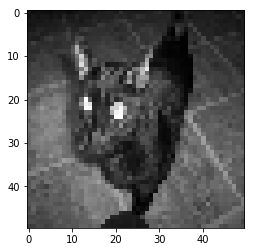

In [13]:
import matplotlib.pyplot as plt

plt.imshow(training_data[1][0], cmap = 'gray')
plt.show()

In [14]:
training_data[1][1]

array([1., 0.])